# Exploratory Data Analysis
**Autori:** Erik Matoviƒç a Simon Kokavec   
**ƒå√≠slo datasetu:** 165  
**Percentu√°lny podiel:** 50/50

## 0. Importovanie

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as py
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
from math import sqrt

## 1. Z√°kladn√Ω opis d√°t spolu s ich charakteristikami

### Zadanie  
Pre dosiahnutie pln√©ho poƒçtu bodov uveƒète  
 - poƒçet z√°znamov,
 - poƒçet atrib√∫tov,
 - ich typy,
 - pre zvolen√© v√Ωznamn√© atrib√∫ty ich distrib√∫cie, z√°kladn√© deskript√≠vne ≈°tatistiky a pod.
 
 ### Rie≈°enie
 
 

In [2]:
# read labor and profiles dataset
df_labor = pd.read_csv('./data/labor.csv', sep='\t')
df_profiles = pd.read_csv('./data/profiles.csv', sep='\t')

**Leuk√©mia** - Rakovina krvi pri ktorej doch√°dza k nekontrolovan√©mu mno≈æeniu (najm√§ po≈°koden√Ωch) bielych krviniek. Tieto krvinky s√∫ produkovan√© v kostnej dreni, kde obmedzuj√∫ spr√°vnu produkciu in√Ωch buniek. 

V kostnej dreni s√∫ okrem bielych krviniek produkovan√© aj ƒçerven√© krvinky a trombocyty. 

### Preƒço luek√©mia zab√≠ja ? 
   - ƒåerven√© krvniky spr√°vne nefunguj√∫ nakoƒæko ich produkciu vytl√°ƒçaj√∫ premno≈æen√© biele krvinky tak≈æe zlyhaj√∫ nedobre okysliƒçen√© org√°ny.
   - Druh√° ≈æivot ohrozuj√∫ca varianta je infekcia/bakt√©ria v tele pacienta. Pri leuk√©mii kv√¥li oslaben√©mu imunitn√©mu (mno≈æstvo po≈°koden√Ωch bielych krviniek) syst√©mu m√¥≈æu by≈• tak√©to infekcie/bakt√©rie fat√°lne.
   - Veƒæk√Ωm probl√©mom je taktie≈æ ukladanie po≈°koden√Ωch bielych krviniek do org√°nov ƒço m√¥≈æe sp√¥sobova≈• r√¥zne probl√©my.  
   - N√≠zka hladina trombocitov sp√¥sobuje zl√© zr√°≈æanie krvi ƒço sp√¥sobbuje ≈æe pacient je n√°chyln√Ω na krv√°cav√© stavy   

Leuk√©mia ƒçasto sp√¥sobuje an√©miu ktor√° sa vyznaƒçuje n√≠zkou hladinou pr√°ve ƒçerven√Ωch krviniek, ktor√© s√∫ taktie≈æ produkovan√© v kostnej dreni. Veƒæk√Ω pokles t√Ωchto krviniek je ≈æivota ohrozuj√∫ci. 

Pacienti s diagnostikovanou leuk√©miou zvyƒçajne m√°vaj√∫ pri laborat√≥rnych v√Ωsledkoch zv√Ω≈°en√© peƒçe≈àov√© enz√Ωmi AST, ALT, ALP. Tieto enz√Ωmi s√∫ jedn√Ωmi z hlavn√Ωch markerov pri diagnostikovan√≠ leuk√©mie z krvi. Tieto po≈°kodenia s√∫ asociovan√© s n√≠zkou hladinou hemoglob√≠nu a n√≠zkou hladinou trombocytov. Tieto peƒçe≈àov√© enz√Ωmy taktie≈æ vykazuj√∫ zv√Ω≈°en√© hodnoty poƒças pretrv√°vaj√∫cej chemoterapie.

**Chronick√° limfo√≠dna leuk√©mia** je be≈ænej≈°ia u star≈°√≠ch pacientov (nad 60) na rozdiel od ak√∫tnej, ktor√° je preva≈æne diagnostikovan√° u ƒæud√≠ pod 20 rokov. 


### ≈†tatistika profilov pacientov

- ##### **Unnamed** (ID) - ƒå√≠slo riadku

- ##### **name** (Meno) - Meno pacienta

- ##### **sex** (Pohlavie) - Pohlavie pacienta

- ##### **current_location** (Poloha) - 

- ##### **blood_group** (Krvn√° skupina) - Krvn√° skupina pacienta

- ##### **residence** (Bydlisko) - 

- ##### **birthdate** (D√°tum narodenia) - D√°tum narodenia pacienta

- ##### **race** (Rasa) - Rasov√° pr√≠slu≈°nos≈• pacienta

- ##### **ssn** (Social Secuirty Number - Soci√°lne Bezpeƒçnostn√© ƒç√≠slo) - Dev√§≈• miestne ƒç√≠slo obyvateƒæov USA.

- ##### **address** (Adresa) - Adresa trval√©ho bydliska pacienta


### ≈†tatistika laborat√≥rnych v√Ωsledkov

- ##### **Unnamed** (ID) - ƒå√≠slo riadku

- ##### **hemoglobin** (Hemoglob√≠n) - ƒåerven√© krvn√© farbivo. Tvor√≠ veƒæk√∫ ƒças≈• erytrocytov. Zabezpeƒçuje prenos kysl√≠ka z pƒæ√∫c do tkan√≠v.

- ##### **leukocyty** (Leukocyty) - Biela krvinka. V krvi je ich menej ako erytrocytov. Leukocyty s√∫ zodpovedn√© za imunitn√∫ odpoveƒè. Zabezpeƒçuj√∫ ochranu proti chorob√°m a nemociam.

- ##### **etytr** () -

- ##### **weight** (Hmotnos≈•) - Hmotnos≈• pacienta

- ##### **trombocyty** (Trombocyty) - Krvn√© do≈°tiƒçky. Veƒæk√© mno≈æstvo v krvi. Ich √∫lohou je udr≈æiava≈• spr√°vnu zr√°≈æanlivos≈• krvi a t√Ωm zabezpeƒçi≈• zastavenie krv√°cania.

- ##### **ast** (Aspartate transaminase - Aspart√°t transamin√°za) - Peƒçe≈àov√Ω enz√Ωm. Ukazateƒæ po≈°kodenia najm√§ peƒçene ale aj srdca, kostrov√Ωch svalov (napr. biceps), obliƒçiek a mozgu.

- ##### **alp** (Alkaline phosphatase - Alkalick√° fosfat√°za) - Peƒçe≈àov√Ω enz√Ωm. Ukazateƒæ po≈°kodenia najm√§ peƒçene ale aj ≈ælƒçov√Ωch ciest, obliƒçiek, kost√≠ a tak ƒèalej.

- ##### **relationship** (Vz≈•ah) - Rodinn√© zalo≈æenie pacienta (≈Ωenat√Ω, rozveden√Ω...)

- ##### **name** (Meno) - Meno pacienta

- ##### **alt** (Alanine transaminase - Alan√≠n transamin√°za) - Peƒçe≈àov√Ω enz√Ωm. Najd√¥le≈æitej≈°√≠ marker ukazovania po≈°kodenia peƒçene.

- ##### **hbver** () -

- ##### **smoker** (Fajƒçiar) - Indikuje ƒçi pacient je fajƒçiar

- ##### **erytrocyty** (Erytrocyty) - ƒåerven√© krvinky. Pomocou hemoglobin prepravuj√∫ kysl√≠k z pƒæ√∫c do tkan√≠v. N√°sledn√Ω oremenen√Ω oxid uhliƒçit√Ω nes√∫ nasp√§≈• do pƒæ√∫c.

- ##### **er-cv** () -

- ##### **indicator** (Indik√°tor) - Indikuje stav pacienta.

- ##### **ssn** (Social Secuirty Number - Soci√°lne Bezpeƒçnostn√© ƒç√≠slo) - Dev√§≈• miestne ƒç√≠slo obyvateƒæov USA.

- ##### **hematokrit** (Hematokrit) - Pomer erytrocytov v krvi. 

In [3]:
df_labor.shape, df_profiles.shape

((10035, 18), (3064, 10))

 - labor.csv m√° 10035 riadkov/atributov a 18 stƒ∫pcov/features  
 - profiles.csv m√° 3064 riadkov/atributov a 10 stƒ∫pcov/features 

In [4]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10035 entries, 0 to 10034
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10035 non-null  int64  
 1   hemoglobin    10005 non-null  float64
 2   leukocyty     10004 non-null  float64
 3   etytr         10005 non-null  float64
 4   weight        10035 non-null  float64
 5   trombocyty    10005 non-null  float64
 6   ast           10005 non-null  float64
 7   alp           10004 non-null  float64
 8   relationship  10035 non-null  object 
 9   name          10035 non-null  object 
 10  alt           10005 non-null  float64
 11  hbver         10005 non-null  float64
 12  smoker        10035 non-null  object 
 13  erytrocyty    10005 non-null  float64
 14  er-cv         10005 non-null  float64
 15  indicator     10035 non-null  float64
 16  ssn           10035 non-null  object 
 17  hematokrit    10005 non-null  float64
dtypes: float64(13), int64(1), 

 - labor.csv m√° 18 stƒ∫pcov, preva≈æne s√∫ numerick√©ho typu(int a float), niektor√© s√∫ typu object(str)  
 - z√°rove≈à je vidie≈• nes√∫mer medzi poƒátom atrib√∫tov - 10035 je celkov√Ω poƒáet, av≈°ak niektor√© z√°znamy maj√∫ o 30 menej, t.j. 10005(stƒ∫pce hematokrit, er-cv, erytrocyty, hbver, alt, ast, trombocyty, eryrt, hemoglobin) a niektor√©(leukocyty a alp) maj√∫ 10004 -> nutnos≈• rie≈°i≈• pri transform√°ci√≠ √∫dajov
 - d√°ta nemaj√∫ null hodnoty, ale vzhƒæadom na rozdielny poƒáet medzi stƒ∫pcami maj√∫ NaN hodnoty(viƒè tail() ni≈æ≈°ie)

In [5]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3064 non-null   int64 
 1   name              3064 non-null   object
 2   sex               3064 non-null   object
 3   current_location  3064 non-null   object
 4   blood_group       3064 non-null   object
 5   residence         3064 non-null   object
 6   birthdate         3064 non-null   object
 7   race              3064 non-null   object
 8   ssn               3064 non-null   object
 9   address           3064 non-null   object
dtypes: int64(1), object(9)
memory usage: 239.5+ KB


 - profiles.csv m√° 10 stƒ∫pcov, preva≈æne s√∫ objektov√©ho typu(str), unnamed: 0 je celoƒç√≠seln√©ho typu(integer) 
 - z√°rove≈à je vidie≈•, ≈æe v≈°etky z√°znamy maj√∫ rovnak√Ω poƒáet atrib√∫tov - 3064

In [6]:
df_labor.head()

Unnamed: 0  hemoglobin  leukocyty    etytr     weight  trombocyty  \
0           0     6.77299    5.28153  4.79087  104.22450     7.22472   
1           1     6.35217    5.45245  3.34754   65.03608     7.00407   
2           2     5.37162    7.36106  7.10989   63.61518     6.95232   
3           3     4.60987    8.04010  4.97779   30.35294     6.63243   
4           4     5.97408    6.66899  5.58872   97.97181     6.18242   

        ast       alp relationship             name      alt    hbver smoker  \
0  61.85014  80.77401      married   Kathryn Wagner  2.01576  9.04461     no   
1  66.90722  90.01585      widowed     Frank Becker  0.81519  9.09262     no   
2  65.33091  74.23784      married  Stephanie Lewis  0.79787  6.18215     no   
3  67.33708  34.67995      married    Luis Williams  0.83917  5.22920     no   
4  67.48751  89.31030      divoced      Donald Hall  1.20122  4.97805    yes   

   erytrocyty     er-cv  indicator          ssn  hematokrit  
0     7.94417  61.31451        0.0  887-91-9698     5.40103  
1     5.33302  58.00624        0.0  506-37-0250     7.68167  
2     6.38771  62.73102        1.0  331-52-1241     6.27422  
3     5.05640  62.60592        1.0  407-22-7513     6.61263  
4     5.10205  59.32470        1.0  486-30-7935     6.23117

In [7]:
df_profiles.head()

Unnamed: 0               name sex  \
0           0  Elizabeth Johnson   F   
1           1       Scott Holmes   M   
2           2       William Roth   M   
3           3    Kimberly Barnes   F   
4           4      Sarah Escobar   F   

                                  current_location blood_group  \
0     (Decimal('-64.545933'), Decimal('5.817377'))          B-   
1   (Decimal('-18.8183775'), Decimal('94.375497'))          A-   
2   (Decimal('35.903361'), Decimal('-133.029344'))          B-   
3  (Decimal('55.2055095'), Decimal('-121.665483'))          B+   
4   (Decimal('49.512264'), Decimal('-121.259776'))         AB-   

                                           residence             birthdate  \
0  319 Bradley Tunnel Suite 246\nBoyerstad, GA 12067  10/30/1938, 00:00:00   
1  28739 Hoffman Valleys Apt. 636\nMichaelville, ...            1927-06-20   
2  8623 Jordan Canyon Suite 498\nJoshuastad, OH 3...            1965-10-02   
3                   Unit 0522 Box 6156\nDPO AE 24368            1962-02-14   
4   30306 Molina Junction\nPort Edwardview, OK 72746           02 Oct 1936   

     race          ssn                                            address  
0   White  518-82-6493  09441 Joyce Route Suite 717\nWest Megan, GA 12969  
1   Black  015-03-8632                          USNS Miller\nFPO AE 08377  
2   Black  898-78-8500           7747 Nicole Wells\nShannonside, MI 84296  
3   White  478-72-0155       228 Colleen Extension\nLake Morgan, AL 34806  
4  Indian  683-31-6335            08249 Gentry Fall\nLewisshire, NY 20037

 - pozrieme sa na d√°ta cez head

In [8]:
df_labor.tail()

Unnamed: 0  hemoglobin  leukocyty    etytr    weight  trombocyty  \
10030       10030     5.52171    7.37800  7.04815  83.93728     7.29506   
10031       10031     5.72390    8.34137  5.88201  78.01508     6.43991   
10032       10032     7.12205    5.31366  4.84312  78.80204     7.76331   
10033       10033     5.39175    5.72726  4.45572  15.18502     5.97680   
10034       10034     7.11616    6.86954  6.25132  53.84799     5.55897   

            ast       alp relationship                name      alt    hbver  \
10030  74.91299  74.00027       single          Gary Parks  6.29230  9.31528   
10031  62.61013  82.18824      divoced      Michael Haynes  0.57249  5.58052   
10032  78.71905  75.14270      married       Donald Porter  2.38935  8.82716   
10033  63.31698  70.90388       single  Cassandra Williams  1.50721      NaN   
10034  63.52155  76.31498      married        Jessica Diaz  1.62680  7.17967   

      smoker  erytrocyty     er-cv  indicator          ssn  hematokrit  
10030      N     9.21009  40.17639        1.0  028-45-3066     6.95568  
10031      Y     5.01783  22.59664        1.0  041-77-3799     6.69757  
10032      Y     7.88062  65.02538        0.0  227-65-3699     5.46733  
10033     no     6.81522  64.56211        0.0  669-16-6262     6.82568  
10034      N     7.49288  70.23548        1.0  524-42-2099     7.11213

In [9]:
df_profiles.tail()

Unnamed: 0             name sex  \
3059        3059  Mark Washington   M   
3060        3060     Kevin Torres   M   
3061        3061       Sarah Hill   F   
3062        3062      Pamela Tran   F   
3063        3063   John Robertson   M   

                                     current_location blood_group  \
3059    (Decimal('-29.355461'), Decimal('39.128253'))         AB+   
3060   (Decimal('44.1155125'), Decimal('-61.909003'))          O+   
3061     (Decimal('50.745986'), Decimal('63.552771'))          B+   
3062   (Decimal('34.925995'), Decimal('-144.163677'))          B-   
3063  (Decimal('-5.7541135'), Decimal('-147.114234'))         AB+   

                                              residence             birthdate  \
3059                   Unit 8496 Box 2991\nDPO AP 60676  02/06/1948, 00:00:00   
3060                   Unit 6807 Box 8669\nDPO AP 84633            2004-08-16   
3061  419 Barrett Radial Apt. 974\nParkermouth, PA 6...  01/04/1993, 00:00:00   
3062  5877 Jessica Viaduct Apt. 409\nLake Kevin, WY ...            1923-01-19   
3063  1990 Paul Tunnel Apt. 686\nNorth Andreachester...            1966/04/22   

       race          ssn                                            address  
3059  Black  769-02-2637  96780 Justin Knoll Suite 589\nJonesview, FL 29858  
3060  white  377-66-0191  03913 Wendy Prairie Suite 372\nWatsonberg, ND ...  
3061  White  749-86-9765  882 Shawn Springs Suite 743\nNorth Amanda, DC ...  
3062  black  300-60-6784   56665 Jorge Manors Apt. 278\nMarcoview, AL 06505  
3063  Black  408-26-3386  2569 Christensen Rapids\nGarrettchester, NM 24512

 - pozrieme sa odzadu na d√°ta

 - m√¥≈æeme vidie≈•, ≈æe v oboch pr√≠padoch stƒ∫pec **Unnamed:0** sl√∫≈æi ako index/riadkovanie, tak to uprav√≠me
 - profiles m√° rozdielny z√°pis pri birthday
 - ssn = social security number

In [10]:
df_profiles.describe()

Unnamed: 0
count  3064.000000
mean   1531.500000
std     884.644938
min       0.000000
25%     765.750000
50%    1531.500000
75%    2297.250000
max    3063.000000

 - descibe na profiles je zbytoƒçn√Ω, ked≈æde **Unnamed: 0** m√° by≈• indexovanie

In [11]:
df_labor.describe()

Unnamed: 0    hemoglobin     leukocyty         etytr        weight  \
count  10035.00000  10005.000000  10004.000000  10005.000000  10035.000000   
mean    5017.00000      6.416198      6.777737      5.990406     69.859131   
std     2896.99931      1.006319      1.645043      1.633699     34.627389   
min        0.00000      2.944150      0.217130      0.000000    -68.325310   
25%     2508.50000      5.735950      5.474353      4.823230     46.136205   
50%     5017.00000      6.428260      6.828010      5.823300     69.491810   
75%     7525.50000      7.095870      8.013475      7.103040     93.608480   
max    10034.00000     10.049840     12.580870     11.632230    191.261970   

         trombocyty           ast           alp           alt         hbver  \
count  10005.000000  10005.000000  10004.000000  10005.000000  10005.000000   
mean       6.437079     68.231703     71.309492      2.197095      6.864928   
std        0.988548      8.291273     19.056185      3.726174      1.700452   
min        2.999650      0.000000      0.000000      0.000000      1.495520   
25%        5.764240     62.610470     62.698557      0.926420      5.422540   
50%        6.443160     68.257620     77.772515      1.229920      6.752090   
75%        7.097900     73.892760     84.970195      1.966430      8.115930   
max       10.383570    100.000000    100.000000    100.000000     13.080820   

         erytrocyty         er-cv     indicator    hematokrit  
count  10005.000000  10005.000000  10035.000000  10005.000000  
mean       6.427883     50.593076      0.641455      6.417913  
std        1.701901     13.840494      0.479597      1.004907  
min        1.032780      0.000000      0.000000      2.713920  
25%        5.151340     41.482190      0.000000      5.735940  
50%        6.296280     50.508420      1.000000      6.425880  
75%        7.672460     59.893420      1.000000      7.085230  
max       12.155200    100.000000      1.000000     10.628720

In [12]:
df_labor.mode()

Unnamed: 0  hemoglobin  leukocyty    etytr    weight  trombocyty  \
0               0     5.49908    5.15386  5.09355 -25.99875     5.55556   
1               1     5.94626    8.38053      NaN   1.90895     5.94844   
2               2     6.10271        NaN      NaN   5.31174     6.41337   
3               3     6.36522        NaN      NaN  10.20883     6.57086   
4               4         NaN        NaN      NaN  15.78444     6.66867   
...           ...         ...        ...      ...       ...         ...   
10030       10030         NaN        NaN      NaN       NaN         NaN   
10031       10031         NaN        NaN      NaN       NaN         NaN   
10032       10032         NaN        NaN      NaN       NaN         NaN   
10033       10033         NaN        NaN      NaN       NaN         NaN   
10034       10034         NaN        NaN      NaN       NaN         NaN   

            ast       alp relationship           name      alt    hbver  \
0      47.47899   3.93519      married   Lisa Johnson  0.80941  4.18238   
1      47.48398  13.05501          NaN  William Smith  0.94810  4.30120   
2      51.16316  14.85714          NaN            NaN  0.95419  4.37407   
3      54.26873  16.21971          NaN            NaN  0.96373  4.37773   
4      54.53670  16.94870          NaN            NaN  1.01803  4.44520   
...         ...       ...          ...            ...      ...      ...   
10030       NaN       NaN          NaN            NaN      NaN      NaN   
10031       NaN       NaN          NaN            NaN      NaN      NaN   
10032       NaN       NaN          NaN            NaN      NaN      NaN   
10033       NaN       NaN          NaN            NaN      NaN      NaN   
10034       NaN       NaN          NaN            NaN      NaN      NaN   

      smoker  erytrocyty     er-cv  indicator          ssn  hematokrit  
0         no     4.39560   8.03320        1.0  025-80-8154     5.37203  
1        NaN     4.65822  16.59002        NaN  036-69-5479     5.77042  
2        NaN     7.46027  20.20161        NaN  055-40-9628     6.08485  
3        NaN     7.79935  25.30805        NaN  085-41-8095     6.92077  
4        NaN         NaN  25.51180        NaN  090-58-2482     7.45304  
...      ...         ...       ...        ...          ...         ...  
10030    NaN         NaN       NaN        NaN          NaN         NaN  
10031    NaN         NaN       NaN        NaN          NaN         NaN  
10032    NaN         NaN       NaN        NaN          NaN         NaN  
10033    NaN         NaN       NaN        NaN          NaN         NaN  
10034    NaN         NaN       NaN        NaN          NaN         NaN  

[10035 rows x 18 columns]

In [13]:
df_labor.hemoglobin.mode()

0    5.49908
1    5.94626
2    6.10271
3    6.36522
dtype: float64

In [14]:
stats.mode(a=df_labor.hemoglobin)

ModeResult(mode=array([5.49908]), count=array([3]))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'etytr'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'alp'}>],
       [<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'hbver'}>,
        <AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'indicator'}>,
        <AxesSubplot:title={'center':'hematokrit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

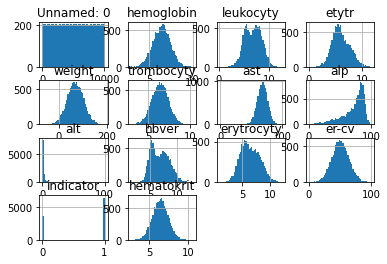

In [15]:
df_labor.hist(bins=50)

 - z uveden√Ωch histogramov sa nepotrebujeme bli≈æ≈õie pozrie≈• na **Unnamed: 0**, preto≈æe to je riadkovanie, a aj na **Indicator**, ktor√Ω ma hodnoty 0 a≈æ 1
 

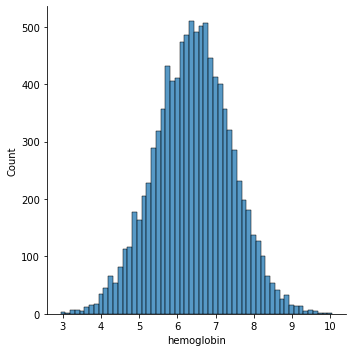

In [16]:
sns.displot(df_labor.hemoglobin)

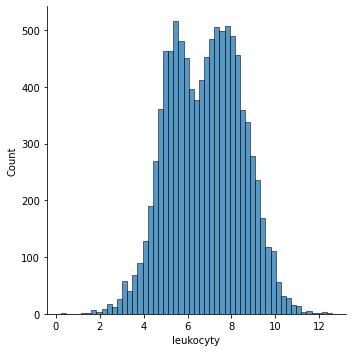

In [17]:
sns.displot(df_labor.leukocyty)

 - leukocyt je hlavn√Ωm ukazovateƒæom pri leuk√©mi√≠ -> doch√°dza poƒças leuk√©mie k veƒæk√©mu mno≈∫stvu bielych krviniek - leukecyty  
 - zauj√≠mav√° distrib√∫cia - nie je Gaussova, bude asi potreba normalizovat? 

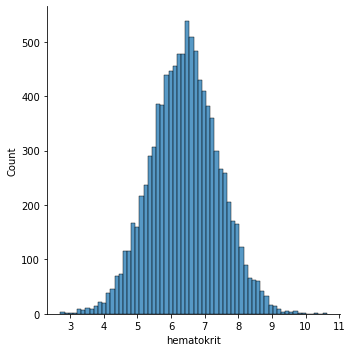

In [18]:
sns.displot(df_labor.hematokrit)

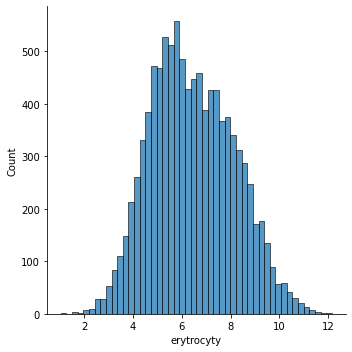

In [19]:
sns.displot(df_labor.erytrocyty)

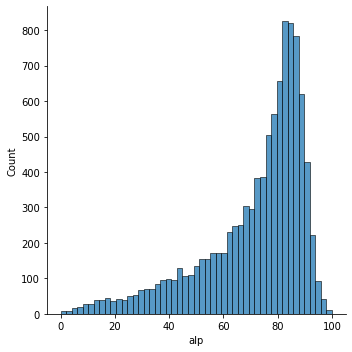

In [20]:
sns.displot(df_labor.alp)

 - alp vyzer√° by≈• v percent√°ch, zauj√≠mav√© je, ≈æe okolo 80% je najƒçastej≈°√≠ poƒçet

## 2. P√°rov√° anal√Ωza d√°t 

### Zadanie

 - Presk√∫majte vz≈•ahy medzi zvolen√Ωmi dvojicami atrib√∫tov.
 - Identifikujte z√°vislost√≠ medzi dvojicami atrib√∫tov a z√°vislosti medzi predikovanou premennou a ostatn√Ωmi premenn√Ωmi.  
 
 ### Rie≈°enie  
 
 
An√©mia  - low red blood cells
        - Produkovan√© v bone marrow 

Leuk√©mia dok√°≈æe sp√¥sobbi≈• an√©miu. Preƒço luek√©mia zab√≠ja ? Lebo nefunguj√∫ poriadne ƒçerven√© krvinky tak≈æe zlyhaj√∫ org√°ny. Alebo n√°s zabije infekcia/bakt√©ria lebo na√°m kv√¥li nej poriadne nefunguje imunitn√Ω syst√©m.

chronic lymphocytic leukemia je viac be≈æn√° u star≈°√≠ch. acute lymphocytic leukemia (ALL) ƒæud√≠a ƒæudi pod 20. Median je okolo 66 rokov. ale ludia pod 20 sa veƒæmi ƒçaso vylieƒçia.
- leukocyt + age


Fajn√© dvojice / ≈†tvorica na anl√Ωzu
- leukocyt + ast - obe vysok√©
- leukocyt + alt - obe vysok√©
- leukocyt + alp - Vysok√© obe (Taktie≈æ vysok√© pri anemick√Ωch pacientoch ale pri leukemick√Ωch je to o dos≈• v√§ƒç≈°ie)


A hematocrit test measures how much of your blood is made up of red blood cells. Ak je ich veƒæa alebo m√°lo je to indik√°t ≈æe nieƒço neni okej.
Fajn√° trojica na anal√Ωzu
- leukocyt (veƒæa) - erythrocyt (malo)
- leukocyt (veƒæa) - hemoglobin (malo)
- leukocyt (veƒæa) - hematokrit (malo)



- hematokrit - erytrocytes
 

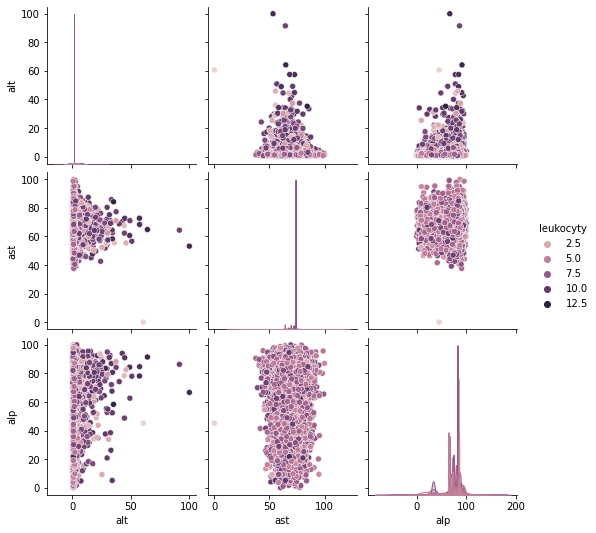

In [21]:
# erytrocyt + leukocyty

df_final = df_labor[['leukocyty', 'alt', 'ast', 'alp']]
sns.pairplot(df_final, hue='leukocyty')

<AxesSubplot:>

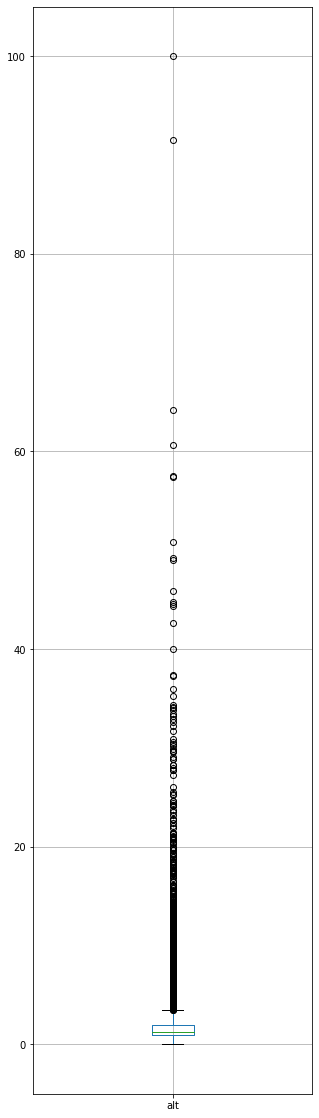

In [22]:
df_labor.boxplot("alt", figsize=(5,20))

In [23]:
# leukocyt + hematokrit

In [24]:
# leukocyt + hemoglobin

In [25]:
# leukocyt vy≈°≈°ie => alt, alp a ast (enz√Ωmy - hovoria o po≈°koden√≠ org√°nov)

## 3. Formul√°cia a ≈°tatistick√© overenie hypot√©z o d√°tach 

### Zadanie

 - Sformulujte dve hypot√©zy o d√°tach v kontexte zadanej predikƒçnej √∫lohy. Pr√≠kladom je napr. pacienti v zlep≈°enom stave maj√∫ v priemere in√∫ (vy≈°≈°iu/ni≈æ≈°iu) hodnotu nejakej l√°tky alebo horm√≥nu ako pacienti v nezlep≈°enom stave.
 - Sformulovan√© hypot√©zy overte vhodne zvolen√Ωm ≈°tatistick√Ωm testom.
 
 ### Rie≈°enie  
 
 #### Pred formul√°ciou ≈°tatistick√Ωch hypot√©z je potrebne urƒçi≈•, ƒçi m√°me Gaussov√∫ distrib√∫ciu
 
 - hemoglobin d√°ta maj√∫ Gaussov√∫ distrib√∫ciu, mo≈æno pou≈æi≈• parametrick√© ≈°tatistick√© met√≥dy
 - overili sme histogramom + distribution plot, Shapiro-Wilk test

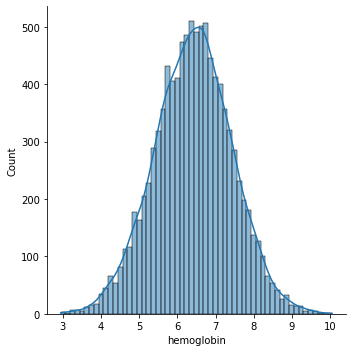

In [26]:
sns.displot(df_labor.hemoglobin, kde=True)

 - Shapiro-Wilk test over√≠ nulov√∫ hypot√©zu ùêª0 - data hemoglobinov s√∫ tzv. normal distribution. Odmietame H0 pri pvalue viac ako 5%, opaƒçne m√¥≈æeme hypot√©zu pova≈æova≈• za prijat√∫.

In [27]:
shapiro_test = stats.shapiro(df_labor.hemoglobin)
print(shapiro_test)

# interpret√°cia
alpha = 0.05 # p_value, ak mame viac ako 5%, tak odmietame data
if shapiro_test.pvalue > alpha:
    print('Normal distribution (H0 neodmietame)')
else:
    print('Other distributions (H0 odmietame)')

ShapiroResult(statistic=nan, pvalue=1.0)
Normal distribution (H0 neodmietame)


/home/erik/.local/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


 - vzhƒæadom na to, ≈æe m√°me viac ako 5000 vzoriek, tak prevedieme e≈°te Kolmogorovov-Smirnovov test normalnosti distribucie

In [37]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
# one-sample Kolmogorovov-Smirnovov test
stats.kstest(df_labor.hemoglobin, df_labor.hemoglobin)
#stats.kstest(df_labor.hemoglobin, 'norm') #pvalue=nan

KstestResult(statistic=0.0, pvalue=1.0)

 #### Hypot√©za 1: 
 
**Analysis of Variance (ANOVA)** - anal√Ωza rozptylu, overenie, ƒçi na veliƒçinu m√° vplyv in√° veliƒçina, The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean

**Hypothesis**
- $H_0$ = the mean across two or more groups are equal 
- **Fail to Reject $H_0$**: All sample distributions are equal 
- **Reject $H_0$**: One or more sample distributions are not equal

URL https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

Statistics=nan, p=nan
Different distributions (reject H0)


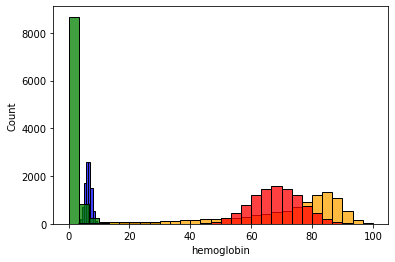

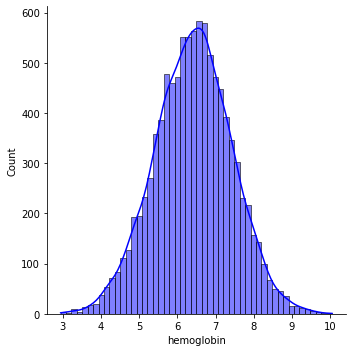

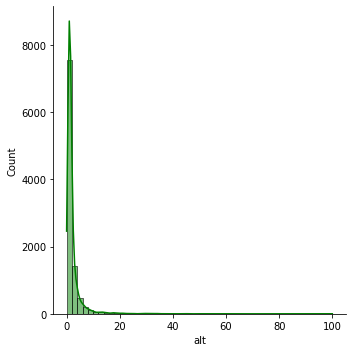

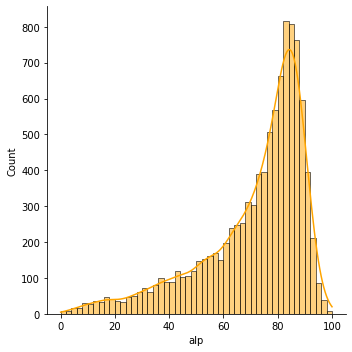

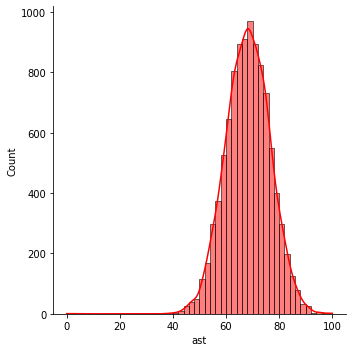

In [29]:
# ak je vyssi hemoglobin, tak je vyssia pravdepodobnost, tak alt, alp a ast budu asi vyssie
#from scipy.stats import f_oneway

alpha = 0.05

# sns.distplot(data1, bins=10)
# sns.distplot(data2, bins=10)
# sns.distplot(data3, bins=10)

sns.histplot(df_labor.hemoglobin, bins=10, color="blue")
sns.histplot(df_labor.alt, bins=30, color="green")
sns.histplot(df_labor.alp, bins=30, color="orange")
sns.histplot(df_labor.ast, bins=30, color="red")

sns.displot(df_labor.hemoglobin, bins=50, color="blue", kde=True)
sns.displot(df_labor.alt, bins=50, color="green", kde=True)
sns.displot(df_labor.alp, bins=50, color="orange", kde=True)
sns.displot(df_labor.ast, bins=50, color="red", kde=True)

# compare samples
stat, p = stats.f_oneway(df_labor.hemoglobin, df_labor.alt, df_labor.alp, df_labor.ast)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

 - qqplot - heavy tail ?

/home/erik/.local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


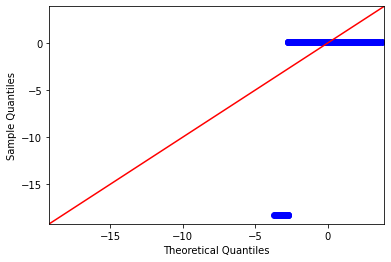

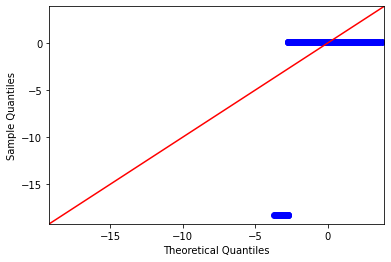

In [41]:
sm.ProbPlot((~df_labor.hemoglobin.isna()),fit=True).qqplot(line='45')

/home/erik/.local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


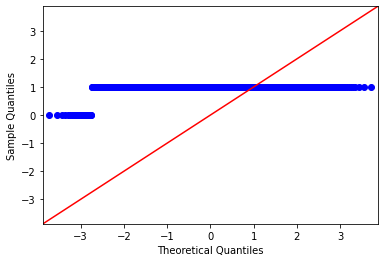

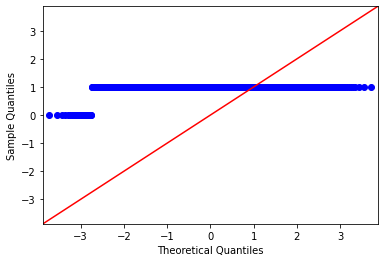

In [31]:
sm.ProbPlot(~df_labor.hemoglobin.isna()).qqplot(line='45')

#### Hypoz√©za 2  

 - Hodnoty leukocytov s√∫ men≈°ie ako hodnoty erytrocytov

0.10393622321873447 7.49823322922944e-48
H1 odmietame - hodnotovo leukocytov je viac


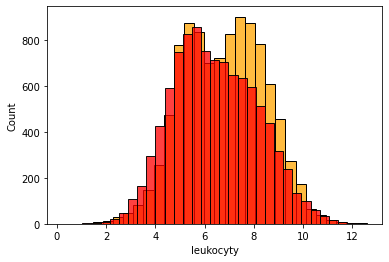

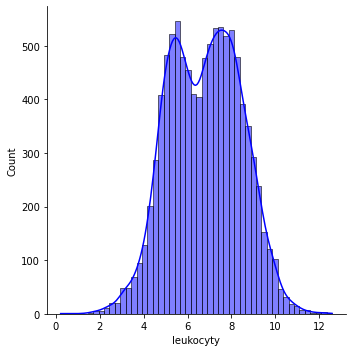

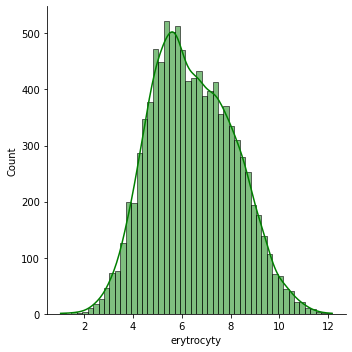

In [45]:
# two-sample Kolmogorovov-Smirnovov test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp
ks2 = stats.ks_2samp(df_labor.erytrocyty, df_labor.leukocyty, alternative='greater')
# greater: H0 is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x

sns.histplot(df_labor.leukocyty, bins=30, color="orange")
sns.histplot(df_labor.erytrocyty, bins=30, color="red")

sns.displot(df_labor.leukocyty, bins=50, color="blue", kde=True)
sns.displot(df_labor.erytrocyty, bins=50, color="green", kde=True)

print(ks2.statistic, ks2.pvalue)

# interpret√°cia
alpha = 0.05 # p_value, ak mame viac ako 5%, tak odmietame data
if ks2.pvalue > alpha:
    print('H0 neodmietame - hodnotovo leukocytov je menej')
else:
    print('H0 odmietame, H1 neodmietame - hodnotovo leukocytov je viac')

## 4. Identifik√°cia probl√©mov v d√°tach s navrhnut√Ωm rie≈°en√≠m  

### Zadanie

 - Identifikujte probl√©my v d√°tach napr.: nevhodn√° ≈°trukt√∫ra d√°t, duplicitn√© z√°znamy, nejednotn√© form√°ty, ch√Ωbaj√∫ce hodnoty, vych√Ωlen√© hodnoty. V d√°tach sa m√¥≈æu nach√°dza≈• aj in√©, tu nevymenovan√© probl√©my.
 - Navrhnut√© rie≈°enie prvotne realizujte na d√°tach. Probl√©m s d√°tami m√¥≈æete rie≈°i≈• iterat√≠vne v ka≈ædej f√°ze aj vo v≈°etk√Ωch f√°zach podƒæa potreby.
 
 ### Rie≈°enie
 
 

 ## Najsk√¥r sa pozrieme na tabuƒæku s profilom pacientov kde n√°jdeme osobn√© inform√°cie o pacientoch.

 - Ako prv√Ω probl√©m m√¥≈æeme vidie≈• stƒ∫pec "Unnamed: 0", ktor√Ω reprezentuje poradie riadkov. Tento stƒ∫pec nieje nutn√© v d√°tach uchov√°va≈• nakoƒæko d√°ta s√∫ indexovan√© automaticky pomocou kni≈ænice pandas. Tak√Ωto stƒ∫pec m√¥≈æe sp√¥sobova≈• veƒæk√© probl√©my pri predspracov√°vani datasetu. Ka≈æd√Ω vymazan√Ω z√°znam naru≈°√≠ ≈°trukt√∫ru tak√©hoto stƒ∫pca a poradie z√°znamov u≈æ viac nebude platn√©. Preto tento stƒ∫pec by bolo st√°le nutn√© upravoa≈• a d√°va≈• pozor ƒçi je v spr√°vnom stave, ƒço je pre n√°s v tomto pr√≠pade zbytoƒçn√© nakoƒæko v≈°etky tieto oper√°cie rob√≠ pandas automaticky s vstavan√Ωm indexovan√≠m. Preto **tento stƒ∫pec navrhujeme odstr√°ni≈•.**
 
 - Na prv√Ω pohƒæad je zrejm√© ≈æe hodnoty v stƒ∫pci sex nadob√∫daju iba dve hodnoty. T√∫to hypot√©zu sme overili pomocou grupnutia stƒ∫pca sex a vieme vyhl√°si≈• ≈æe sa v tomto stƒ∫pci nach√°dzaj√∫ iba hodnoty F a M. Tieto hodnoty reprezentuj√∫ pohlavie pacienta a preto v tomto stƒ∫pci sa in√° hodnota ani len vyskytn√∫≈• nem√¥≈æe. Preto **tento stƒ∫pec navrhujeme zmeni≈• na d√°tov√Ω typ bool a uchov√°va≈• 0 namiesto M (Male) a 1 namiesto F (Female).**
 
 - Stƒ∫pec birthday je stƒ∫pec, ktor√Ω taktie≈æ sp√¥sobuje probl√©m v konzistentnosti d√°t. Tento stƒ∫pec vyjadruje d√°tum narodenia pacientov av≈°ak je zap√≠san√Ω v r√¥znych form√°ch...

 Zle nap√≠san√©.
 - Stƒ∫pec sex zmeni≈• na bool lebo je tam iba F a M
 - Zjednoti≈• na jeden typ stƒ∫pec birthday
 - Treba overi≈• ƒçi s√∫ tam duplicitn√© z√°znami
 - Treba odstr√°ni≈• hodnoty ktor√© sa dosiahni≈• nedaj√∫ napr. m√≠nusov√© (V√°ha)
 - Treba n√°jst ch√Ωbaj√∫ce hodnoty
     - pr√≠pad 1: Stƒ∫pce v ktor√Ωch je to jedno: Stƒ∫pce v ktor√Ωch nevieme predikova≈• tak√∫to hodnoty napr√≠klad sex alebo meno. Tieto stƒ∫pce nerie≈°i≈• a ked budeme ich vyu≈æ√≠va≈• tak jednoducho t√∫to hodnotu nezar√°ta≈•. M√¥≈æeme ju keƒè tak nahradi≈• X. Pri ƒç√≠seln√Ωch m√¥≈æeme popr√≠pade doplni≈• median.
     V datasete prfiles v≈°etky
     V datasete labor: 
     
     - pr√≠pad 2: Stƒ∫pce v ktor√Ωch to nie je jedno: V t√Ωchto stƒ∫pcoch potrebujeme tieto hodnoty lebo s√∫ d√¥le≈æit√© pre vypoƒçty d√°tovej anal√Ωzy. Preto treba sa s t√Ωmito hodnotami nejalo vysporiada≈•. M√¥≈æeme n√°jst stƒ∫pce ktor√© spolu s√∫visia a n√°jst z√°znam s podobn√Ωmi hodnotami a n√°sledne predpoklada≈• hodnotu.
    V datasete profiles ani jedno
    V datasete labor:

 - nahradenie **Unnamed: 0** v oboch datasetoch za index

## Teraz sa pozrieme na tabuƒæku laborat√≥rnych v√Ωsledkov.

 - Veƒæmi zreteƒæn√Ω probl√©m je takisto aj v tomto datasete v stƒ∫pci "Unnamed: 0". Tento stƒ∫pec znovu reprezentuje poradie riadkov a znovu je pre n√°s redundantn√Ω. D√¥vod jeho redundancie je vysvetlen√Ω vy≈°≈°ie pri indentifik√°cii probl√©mov datasetu profilov pacientov. **Tento stƒ∫pec navrhujeme odstr√°ni≈•.**
 
- Stƒ∫pec smoker je na prv√Ω pohƒæad taktie≈æ probl√©mov√Ω. Po jednoduchom groupnut√≠ vid√≠me ≈æe v tomto stƒ∫pci sa nach√°dza zbytoƒçne veƒæk√© mno≈æstvo oznaƒçen√≠ reprezentuj√∫cich ƒç√≠ pacient je fajƒçiar alebo nieje. Tento syst√©m zapisovania sa d√° zjednodu≈°i≈• iba na dve hondoty nakoƒæko pacient m√¥≈æe by≈• iba fajƒçiar alebo nefajƒçiar - niƒç medzi. Preto **tento stƒ∫pec navrhujeme zmeni≈• na d√°tov√Ω typ bool a uchov√°va≈• 0 namiesto N/No a 1 namiesto Y/Yes.** Hodnoty nan ponech√°me a vr√°time sa k nim v ƒèaƒæ≈°om kroku. 

- Stƒ∫pec indicator sa na prv√Ω pohƒæad tie≈æ jav√≠ ako probl√©movy a preto sme nechali vyp√≠sa≈• v≈°etky typy hodn√¥t pomocou value_counts. Tento v√Ωpis potvrdil ≈æe tento stƒ∫pec je probl√©movy a je nutn√© ho o≈°etri≈•. Stƒ∫pec indicator indikuje ƒçi pacientovi m√° by≈• poskytnut√° ƒèaƒæ≈°ia lieƒçba a preto sa v ≈àom m√¥≈æu vykytova≈• iba hodnoty 1/0 alebo inak povedan√© True/False. Tento stƒ∫pec nielen≈æe je nastaven√Ω na float ale nach√°dza sa v ≈àom aj mno≈æstvo hodn√¥t ktor√© niesu ani 1 ani 0. Preto ***tento stƒ∫pec navrhujeme zmeni≈• na d√°tov√Ω typ bool a uchov√°va≈• jednotky a nuly vo form√°te bool namiesto float.** Hodnoty ktor√© niesu 0 ani 1 vyma≈æeme. 


  Zle nap√≠san√©.
 - Stƒ∫pec smoker zmeni≈• na bool lebo je tam iba Y a N.
 - Stƒ∫pec indicator zmeni≈• na bool lebo je tam iba 1 a 0
 - Treba odstr√°ni≈• hodnoty ktor√© sa dosiahni≈• nedaj√∫ napr. m√≠nusov√© 
 - Treba overi≈• ƒçi s√∫ tam duplicitn√© z√°znami
 




## Spojen√© probl√©my
 - Stƒ∫pec ssn je v oboch tabuƒæk√°ch preto treba pozrie≈• ƒçi ich mus√≠me necha≈• oba. pravdepodobne nie 



